In [1]:
#Requires Gadfly
using Plots, ApproxFun, Interact
gadfly();

INFO: Recompiling stale cache file /Users/solver/.julia/lib/v0.4/ApproxFun.ji for module ApproxFun.


    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /Users/solver/.julia/v0.4/Interact/src/IJulia/setup.jl:99
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Any) at replutil.jl:4.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Reactive.Signal)
before the new definition.


# $$u'' + 2u = \cos(\omega t)\qquad u(0)=u'(0)=0$$

Slide  to $\omega=\sqrt 2$ to see a resonance, where the solution grows

Interact.Slider{Float64}(Signal{Float64}(1.2727922061357857, nactions=0),"ω",1.2727922061357857,0.0:0.14142135623730953:2.687005768508881)

[Plots.jl] Initializing backend: gadfly

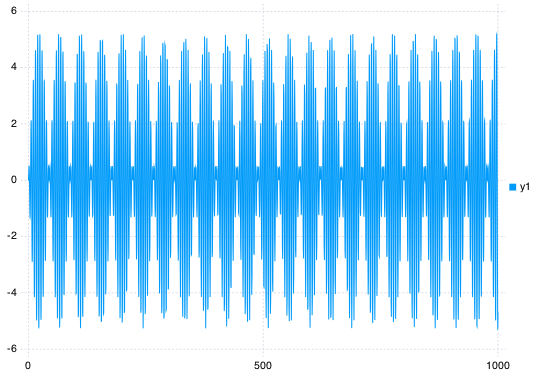

In [2]:
t=Fun(identity,[0.,1000.]) 
S=space(t)
D=Derivative(S)           
B=[ldirichlet(),lneumann()]  

L=D^2+2I  # our differential operator

@manipulate for ω=0.:.1sqrt(2):2sqrt(2)
    u=[B;L]\[0.;0.;cos(ω*t)]
    plot(u).o
end

# Bessel equation $$x^2 u'' + x u + (x^2 - \nu^2)u$$

Interact.Slider{Float64}(Signal{Float64}(1000.0, nactions=0),"ν",1000.0,0.0:0.1:2000.0)

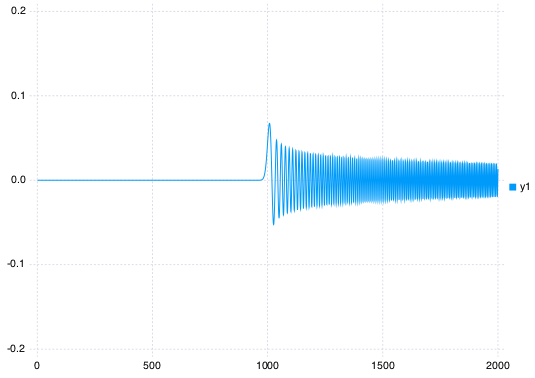

In [3]:
x=Fun(identity,[1.,2000.])  
d=domain(x)                    
D=Derivative(d)               
B=dirichlet(d)  
@manipulate for ν=0:.1:2000
	L=x^2*D^2 + x*D + (x^2 - ν^2)   # our differential operator
   	u=[B;L]\[besselj(ν,first(d)),besselj(ν,last(d))]
    plot(u;ylims=(-.2,.2)).o
end

# Exponentially ill-conditioned Lee & Greengard BVP $\epsilon u'' - x u' + u = 0$

Interact.Slider{Float64}(Signal{Float64}(0.2, nactions=0),"ϵ",0.2,0.0005:0.0005:0.4)

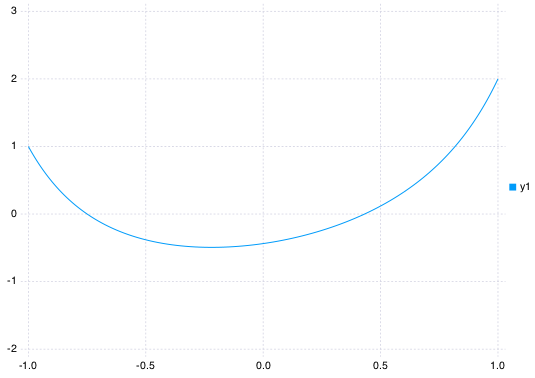

In [4]:
x=Fun(identity)
d=domain(x)  #[-1.,1.]
D=Derivative(d)
B=dirichlet(d)

@manipulate for ϵ=0.0005:0.0005:0.4
    L=ϵ*D^2 - x*D + I

     u=[B;L]\[1.,2.]
    plot(u;ylims=(-2.,3.)).o
end

# Piecewise $$u'' + \omega u \begin{cases} 1 & |x| < c\cr 0 & {\rm otherwise}\end{cases}  = 0,\qquad u(-1)=1,u(1)=0$$

Interact.Slider{Int64}(Signal{Int64}(25000, nactions=0),"ω",25000,1:50000)

Interact.Slider{Float64}(Signal{Float64}(0.55, nactions=0),"c",0.55,0.1:0.01:1.0)

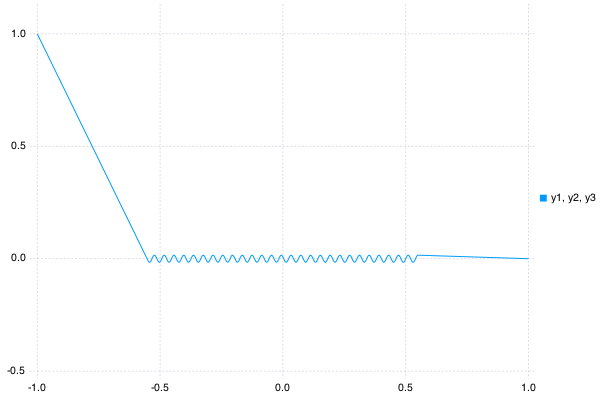

In [7]:
@manipulate for ω=1:50000,c=0.1:0.01:1.
    f=Fun(x->abs(x)<c?1:0,[-1.,-c,c,1.])
    S=space(f)
    B=dirichlet(S)
    D=Derivative(S)    
    plot([B;D^2+ω*f]\[1.,0.];ylims=(-0.5,1.1)).o
end

# Forced Helmholtz equation $$u_{xx} + u_{yy} + k u = {\rm e}^{-(x-x_0)^2-(y-y_0)^2},\qquad \partial u = 0$$

Interact.Slider{Int64}(Signal{Int64}(105, nactions=0),"ny",105,10:200)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"x0",0.0,-1.0:0.1:1.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"y0",0.0,-1.0:0.1:1.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"k",0.0,-1000.0:1.0:1000.0)

[Plots.jl] Initializing backend: gadfly

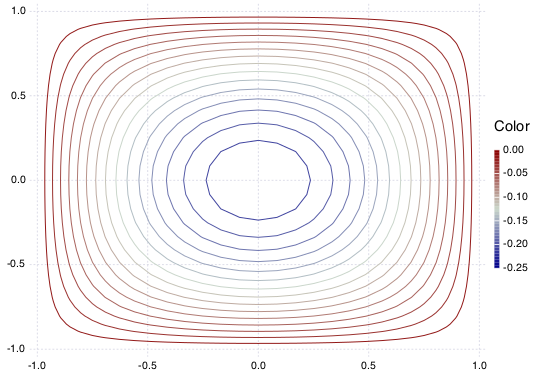

In [2]:
d=Interval()^2
B=dirichlet(d)
Δ=lap(d)

@manipulate for ny=10:200,x0=-1.:0.1:1.,y0=-1.:0.1:1.,k=-1000.:1000.
    f=Fun((x,y)->exp(-(x-x0)^2-(y-y0)^2),d)
    u=pdesolve([B;Δ+k*I],[zeros(∂(d));f],ny)
    contour(u).o
end

Interact.Slider{Int64}(Signal{Int64}(105, nactions=0),"ny",105,10:200)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"x0",0.0,-1.0:0.1:1.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"y0",0.0,-1.0:0.1:1.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"k",0.0,-1000.0:1.0:1000.0)

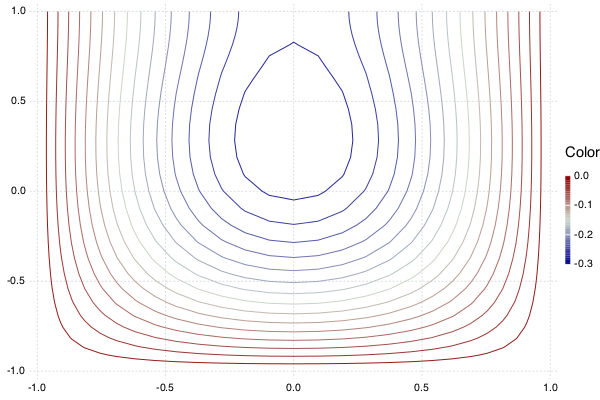

In [4]:
d=Interval()^2
B=[dirichlet(d[1])⊗I;I⊗ldirichlet(d[2]);I⊗rneumann(d[2])]
Δ=lap(d)

@manipulate for ny=10:200,x0=-1.:0.1:1.,y0=-1.:0.1:1.,k=-1000.:1000.
    f=Fun((x,y)->exp(-(x-x0)^2-(y-y0)^2),d)
    u=pdesolve([B;Δ+k*I],[zeros(∂(d));f],ny)
    contour(u).o
end

#     Dirichlet Helmholtz equation $$\Delta u + k u = 0, u(\pm 1,y)=u(x,\pm 1) = 1$$

Interact.Slider{Float64}(Signal{Float64}(750.0, nactions=0),"k",750.0,-500.0:0.001:2000.0)

Interact.Slider{Int64}(Signal{Int64}(105, nactions=0),"ny",105,10:200)

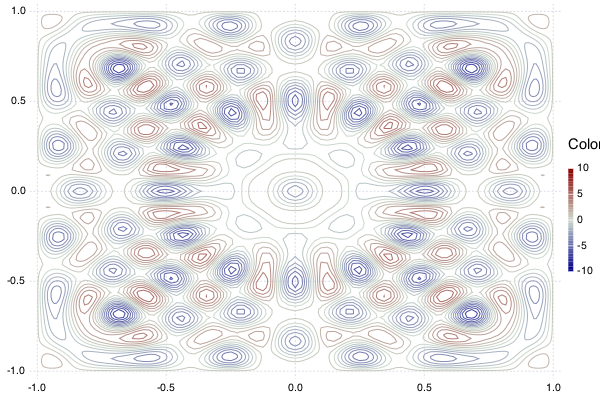

In [6]:
d=Interval()^2
B=dirichlet(d)
Δ=lap(d)

@manipulate for k=-500.0:.001:2000.0,ny=10:200
    contour(pdesolve([B;Δ+k*I],ones(∂(d)),ny)).o
end

# Convection diffusion $u_t = \epsilon u_{xx} + (B+C x) u_x, u(x,0)=e^{-20x^2}, u(-1,t)=u(1,t) = 0$

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"ε",1.0,0.001:0.001:2.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"B",0.0,-5.0:0.1:5.0)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"C",0.0,-5.0:0.1:5.0)

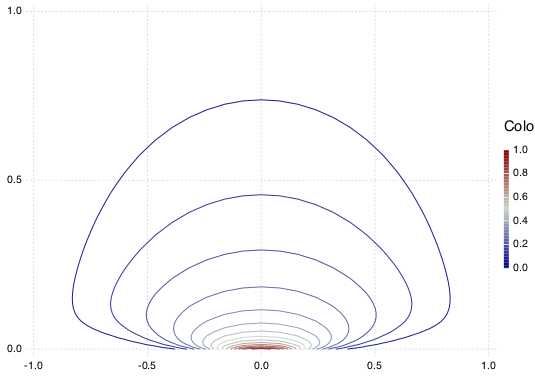

In [4]:
dx=Interval();dt=Interval(0,1.)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
x=Fun(identity,dx)
@manipulate for ε=0.001:0.001:2.,B=-5.:0.1:5.,C=-5.:0.1:5.
    V=B+C*x    
    # Parentheses are a hack to get rank 2 PDE
    u=[timedirichlet(d);Dt-ε*Dx^2-V*Dx]\Fun(x->exp(-20x^2),dx)
    contour(u;xlims=(-1.,1.),ylims=(0.,1.)).o
end

# Schrodinger equation $$i \epsilon u_t = -{\epsilon^2 \over 2} u_{xx} + x^2 u$$

Interact.Slider{Float64}(Signal{Float64}(0.151, nactions=0),"ϵ",0.151,0.005:0.002:0.299)

Interact.Slider{Int64}(Signal{Int64}(125, nactions=0),"ny",125,50:200)

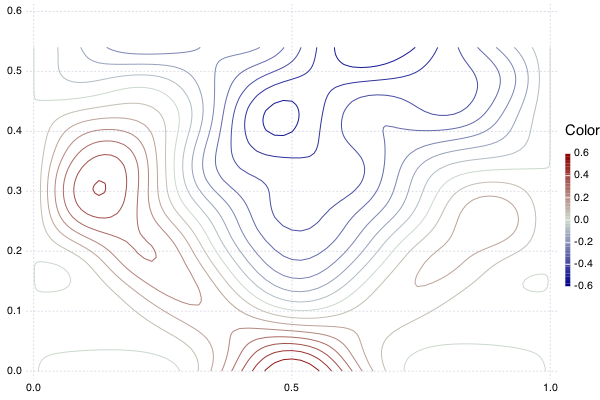

In [6]:
dx=Interval(0.,1.);dt=Interval(0.0,0.54)
d=dx*dt

V=Fun(x->x^2,dx)

Dt=Derivative(d,2);Dx=Derivative(d,1)

@manipulate for ϵ=0.005:0.002:0.3,ny=50:200
    u0=Fun(x->exp(-25*(x-.5)^2)*exp(-1.im/(5*ϵ)*log(2cosh(5*(x-.5)))),dx)
    L=1im*ϵ*Dt+.5*ϵ^2*Dx^2-V⊗1

    u=pdesolve([timedirichlet(d);L],u0,ny)
    ApproxFun.contour(real(u)).o
end

# Nonlinear BVP $$\epsilon u'' + 6(1-x^2)u' +u^2=1$$ $$u(-1)=u(1)=0$$

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"ε",0.5,0.001:0.001:1.0)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"c",0.5,0.0:0.1:1.0)

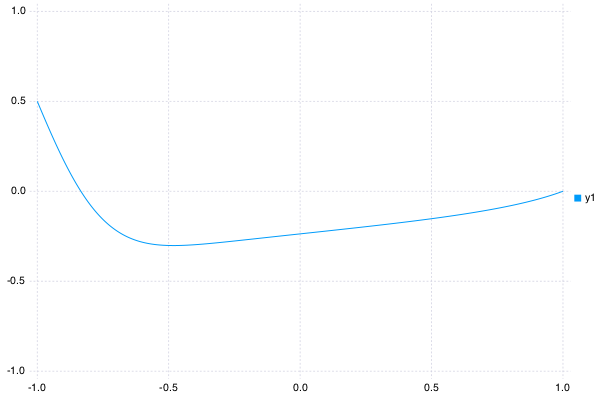

In [10]:
x=Fun()
u0=0.x
@manipulate for ε=0.001:0.001:1.,c=0.:0.1:1.
    N=u->[u(-1.)-c;u(1.);ε*u''+6*(1-x^2)*u'+u^2-1.]

    u=newton(N,u0)
    plot(u;ylims=(-1.,1.)).o
end